In [5]:
'''
import os

# Replace 'path_to_images' with the path to the directory containing your images.
path_to_images = '/Users/zijielei/PycharmProjects/mindspark-hackathon-Huixian-Gong/Dataset/Normal'


# List all files in the directory
image_files = os.listdir(path_to_images)

# Sort the files to ensure consistent numbering
image_files.sort()

# Initialize an index counter
index = 1

# Loop through the image files and rename them
for image_file in image_files:
    # Check if the file is an image (you can add more image extensions as needed)
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        # Generate the new filename with the index
        new_filename = f"{index:04d}.jpg"  # Adjust the format as needed (e.g., {index}.jpg)
        
        # Construct the full paths to the old and new filenames
        old_path = os.path.join(path_to_images, image_file)
        new_path = os.path.join(path_to_images, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        
        # Increment the index
        index += 1

print("Images renamed and indexed successfully.")

'''

'\nimport os\n\n# Replace \'path_to_images\' with the path to the directory containing your images.\npath_to_images = \'/Users/zijielei/PycharmProjects/mindspark-hackathon-Huixian-Gong/Dataset/Normal\'\n\n\n# List all files in the directory\nimage_files = os.listdir(path_to_images)\n\n# Sort the files to ensure consistent numbering\nimage_files.sort()\n\n# Initialize an index counter\nindex = 1\n\n# Loop through the image files and rename them\nfor image_file in image_files:\n    # Check if the file is an image (you can add more image extensions as needed)\n    if image_file.endswith((\'.jpg\', \'.jpeg\', \'.png\', \'.gif\', \'.bmp\')):\n        # Generate the new filename with the index\n        new_filename = f"{index:04d}.jpg"  # Adjust the format as needed (e.g., {index}.jpg)\n        \n        # Construct the full paths to the old and new filenames\n        old_path = os.path.join(path_to_images, image_file)\n        new_path = os.path.join(path_to_images, new_filename)\n        \

In [6]:
'''
import os

# Replace 'path_to_images' with the path to the directory containing your images.
path_to_images = '/Users/zijielei/PycharmProjects/mindspark-hackathon-Huixian-Gong/Dataset/Pothole'


# List all files in the directory
image_files = os.listdir(path_to_images)

# Sort the files to ensure consistent numbering
image_files.sort()

# Initialize an index counter
index = 1

# Loop through the image files and rename them
for image_file in image_files:
    # Check if the file is an image (you can add more image extensions as needed)
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        # Generate the new filename with the index
        new_filename = f"{index:04d}.jpg"  # Adjust the format as needed (e.g., {index}.jpg)
        
        # Construct the full paths to the old and new filenames
        old_path = os.path.join(path_to_images, image_file)
        new_path = os.path.join(path_to_images, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        
        # Increment the index
        index += 1

print("Images renamed and indexed successfully.")
'''

'\nimport os\n\n# Replace \'path_to_images\' with the path to the directory containing your images.\npath_to_images = \'/Users/zijielei/PycharmProjects/mindspark-hackathon-Huixian-Gong/Dataset/Pothole\'\n\n\n# List all files in the directory\nimage_files = os.listdir(path_to_images)\n\n# Sort the files to ensure consistent numbering\nimage_files.sort()\n\n# Initialize an index counter\nindex = 1\n\n# Loop through the image files and rename them\nfor image_file in image_files:\n    # Check if the file is an image (you can add more image extensions as needed)\n    if image_file.endswith((\'.jpg\', \'.jpeg\', \'.png\', \'.gif\', \'.bmp\')):\n        # Generate the new filename with the index\n        new_filename = f"{index:04d}.jpg"  # Adjust the format as needed (e.g., {index}.jpg)\n        \n        # Construct the full paths to the old and new filenames\n        old_path = os.path.join(path_to_images, image_file)\n        new_path = os.path.join(path_to_images, new_filename)\n        

In [2]:
# import os
# os.system("pwd")
# os.system("ls")
# Normal_Pic_count = os.system("ls Dataset/Normal | wc -l")
# Pothole_Pic_count = os.system("ls Dataset/Pothole/ | wc -l")

import os

# folder path
Normal_dir_path = r'Dataset/Normal'
Normal_count = 0
# Iterate directory
for path in os.listdir(Normal_dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(Normal_dir_path, path)):
        Normal_count += 1
print('File count:', Normal_count)

Pothole_dir_path = r'Dataset/Pothole/'
Pothole_count = 0
# Iterate directory
for path in os.listdir(Pothole_dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(Pothole_dir_path, path)):
        Pothole_count += 1
print('File count:', Pothole_count)


File count: 493
File count: 705


<BarContainer object of 1 artists>

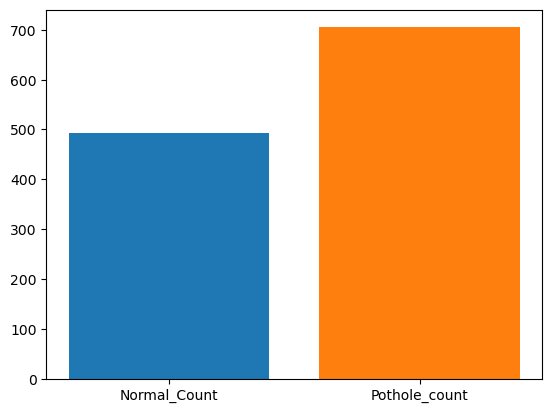

In [6]:
import matplotlib.pyplot as plt

plt.bar('Normal_Count', Normal_count)
plt.bar('Pothole_count', Pothole_count)
